### Importación de datos



In [1]:
# Importación de Paquetes para datos y operaciones.
import math
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

###Mostrar las primeras lineas del cvs.

In [3]:
def mostarDatos (tienda):
    return tienda.head()

In [4]:
mostarDatos(tienda)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 0. Creación de tabla para recopilar datos.

In [5]:
diccionarioDatos = {'Nombre de la tienda': ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']}
tiendas = [tienda, tienda2, tienda3, tienda4]

# Tabla de datos por Categoria: nameMax/minIVCategoría max/minIngresoVentas/Venta, ventas/ingresoVentasDelMax/Min, max/minVentas/IngresoVentas
tablaDatosCategoria = pd.DataFrame(diccionarioDatos)

# Tabla de datos por Producto: nameMax/minIVCategoría max/minIngresoVentas/Venta, ventas/ingresoVentasDelMax/Min, max/minVentas/IngresoVentas
tablaDatosProducto = pd.DataFrame(diccionarioDatos)

# Tabla de datos generales: Ingreso Total, Calificacion Promedio, Costo de envio Promedio
tablaDatos = pd.DataFrame(diccionarioDatos)

#1. Análisis de facturación



In [6]:
def ingresoTotal (tienda):
    return tienda['Precio'].sum()

In [76]:
def ventaTotal (tienda):
    return tienda['Producto'].count()

In [77]:
tablaDatos['Ingreso Total'] = [ingresoTotal(tienda) for tienda in tiendas]
tablaDatos['Ventas Totales'] = [ventaTotal(tienda) for tienda in tiendas]

In [78]:
tablaDatos

,Nombre de la tienda,Ingreso Total,Calificación promedio,Costo de envío promedio,Ingreso del producto promedio (max),Ingreso del producto promedio (min),Ventas del producto promedio (max),Ventas del producto promedio (min),Ingreso de la categoria promedio (max),Ingreso de la categoria promedio (min),Ventas de la categoria promedio (max),Ventas de la categoria promedio (min),Ventas Totales
0,Tienda 1,1.150880e+09,3.98,26018.61,2369170.00,16320.00,491038.33,143357.58,958690.85,50779.77,403513.33,74259.65,2359
1,Tienda 2,1.116344e+09,4.04,25216.24,2058650.91,14302.22,48120.00,181621.88,973533.41,51224.37,399154.52,81474.59,2359
2,Tienda 3,1.098020e+09,4.05,24805.68,1997794.00,14554.55,292978.95,35348.57,910811.09,51344.32,402950.10,85084.75,2359
3,Tienda 4,1.038376e+09,4.00,23459.46,2014531.25,16390.70,531391.94,782518.18,907929.27,49846.52,401101.88,441778.82,2358


# 2. Ventas por categoría

### Tablas para ventas por categoría

In [8]:
# Ventas Por Categoría, es decir, el precio total.
def ingresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum()

In [9]:
# Cantidad De productos vendidos por categoría.
def ventasPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count()

In [10]:
# columas de la tabla de Categorias.
columnasCategorias = ['Ventas (tienda 1)','Ingreso total (tienda 1)',
                      'Ventas (tienda 2)','Ingreso total (tienda 2)',
                      'Ventas (tienda 3)','Ingreso total (tienda 3)',
                      'Ventas (tienda 4)','Ingreso total (tienda 4)']

In [11]:
# Ingreso de la tabla para la visualizacion de ventas e ingresos totales de las tiendas.
tablaDeCategorias = pd.DataFrame(columns = columnasCategorias)

for i in range(0,len(tablaDeCategorias.columns),2):
    j = (i+1)//2
    tablaDeCategorias[columnasCategorias[i]] = ventasPorCategoria(tiendas[j])
    tablaDeCategorias[columnasCategorias[i+1]] = ingresoPorCategoria(tiendas[j])

In [12]:
# Tabla de Productos por Tieda: Ventas, IngresoVentas
tablaDeCategorias

,Ventas (tienda 1),Ingreso total (tienda 1),Ventas (tienda 2),Ingreso total (tienda 2),Ventas (tienda 3),Ingreso total (tienda 3),Ventas (tienda 4),Ingreso total (tienda 4)
Categoría del Producto,,,,,,,,
Artículos para el hogar,171,12698400.0,181,14746900.0,177,15060000.0,201,15074500.0
Deportes y diversión,284,39290000.0,275,34744500.0,277,35593100.0,277,33350100.0
Electrodomésticos,312,363685200.0,305,348567800.0,278,329237900.0,254,283260200.0
Electrónicos,448,429493500.0,422,410831100.0,451,410775800.0,451,409476100.0
Instrumentos musicales,182,91299000.0,224,104990300.0,177,77380900.0,170,75102400.0
Juguetes,324,17995700.0,313,15945400.0,315,19401100.0,338,20262200.0
Libros,173,8784900.0,197,10091200.0,185,9498700.0,187,9321300.0
Muebles,465,187633700.0,442,176426300.0,499,201072100.0,480,192528900.0


### IngresoTotal/Ventas maximas

In [13]:
# El nombre de la categoría con mayor venta.
def nameCategoriaMaxIngreso (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().idxmax()

# La venta de la categoría con mayor venta.
def maxIngresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().max()

In [39]:
# El nombre de la categoría con mayor venta.
def nameCategoriaMinIngreso (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().idxmin()

# La venta de la categoría con mayor venta.
def minIngresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().min()

In [14]:
# El nombre de la categoría con mayor cantidad de productos vendidos.
def nameCategoriaMaxVenta (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().idxmax()

# La mayor cantidad de productos vendidos.
def maxVentaPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().max()

In [40]:
# El nombre de la categoría con mayor cantidad de productos vendidos.
def nameCategoriaMinVenta (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().idxmin()

# La mayor cantidad de productos vendidos.
def minVentaPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().min()

In [15]:
# Añade la Categoria con mayor ventas de cada tienda y las ventas obtenidas.
tablaDatosCategoria['Categoría con mayor Ingreso'] = [nameCategoriaMaxIngreso(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso Total (max)'] = [maxIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas de la categoría (max)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[i,'Categoría con mayor Ingreso'],columnasCategorias[i*2]] for i in range(0,4) ]

In [16]:
# Añade la Categoria con más productos vendidos de cada tienda y las cantidades obtenidas.
tablaDatosCategoria['Categoría con mayor ventas'] = [nameCategoriaMaxVenta(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas (max)'] = [maxVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso de la categoría (max)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[i,'Categoría con mayor ventas'],columnasCategorias[(i*2)+1]] for i in range(0,4) ]

In [41]:
# Añade la Categoria con menor ventas de cada tienda y las ventas obtenidas.
tablaDatosCategoria['Categoría con menor Ingreso'] = [nameCategoriaMinIngreso(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso Total (min)'] = [minIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas de la categoría (min)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[i,'Categoría con menor Ingreso'],columnasCategorias[i*2]] for i in range(0,4) ]

In [42]:
# Añade la Categoria con más productos vendidos de cada tienda y las cantidades obtenidas.
tablaDatosCategoria['Categoría con menor ventas'] = [nameCategoriaMinVenta(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas (min)'] = [minVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso de la categoría (min)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[i,'Categoría con menor ventas'],columnasCategorias[(i*2)+1]] for i in range(0,4) ]

In [43]:
tablaDatosCategoria

,Nombre de la tienda,Categoría con mayor Ingreso,Ingreso Total (max),Ventas de la categoría (max),Categoría con mayor ventas,Ventas (max),Ingreso de la categoría (max),Categoría con menor Ingreso,Ingreso Total (min),Ventas de la categoría (min),Categoría con menor ventas,Ventas (min),Ingreso de la categoría (min)
0,Tienda 1,Electrónicos,429493500.0,448,Muebles,465,187633700.0,Libros,8784900.0,173,Artículos para el hogar,171,12698400.0
1,Tienda 2,Electrónicos,410831100.0,422,Muebles,442,176426300.0,Libros,10091200.0,197,Artículos para el hogar,181,14746900.0
2,Tienda 3,Electrónicos,410775800.0,451,Muebles,499,201072100.0,Libros,9498700.0,185,Artículos para el hogar,177,15060000.0
3,Tienda 4,Electrónicos,409476100.0,451,Muebles,480,192528900.0,Libros,9321300.0,187,Instrumentos musicales,170,75102400.0


# 3. Calificación promedio de la tienda


In [18]:
# Calcula la media de la calificacion de la tienda y la redonde a 2 decimales.
def mediaCalificacion (tienda):
    return round(tienda['Calificación'].mean(),2)

In [19]:
tablaDatos['Calificación promedio'] = [mediaCalificacion(tienda) for tienda in tiendas]
tablaDatos

,Nombre de la tienda,Ingreso Total,Calificación promedio
0,Tienda 1,1.150880e+09,3.98
1,Tienda 2,1.116344e+09,4.04
2,Tienda 3,1.098020e+09,4.05
3,Tienda 4,1.038376e+09,4.00


# 4. Productos más y menos vendidos

### Ingreso/Ventas por producto

In [20]:
# Precio total de las ventas por producto de la tienda.
def ingresoPorProducto (tienda):
    return tienda.groupby('Producto')['Precio'].sum()

In [21]:
# Cantidad de productos vendidos por producto.
def ventasPorProductos (tienda):
    return tienda.groupby('Producto')['Producto'].count()

In [22]:
# Columnas para la creacion de tabla de productos.
columnasProductos = ['Ventas (tienda 1)','Ingreso total (tienda 1)',
                     'Ventas (tienda 2)','Ingreso total (tienda 2)',
                     'Ventas (tienda 3)','Ingreso total (tienda 3)',
                     'Ventas (tienda 4)','Ingreso total (tienda 4)']

In [23]:
# Creacion de la tabla para visualizar la tabla por productos.
tablaDeProductos = pd.DataFrame(columns = columnasProductos)

for i in range(0,len(tablaDeProductos.columns),2):
    j = (i+1)//2
    tablaDeProductos[columnasProductos[i]] = ventasPorProductos(tiendas[j])
    tablaDeProductos[columnasProductos[i+1]] = ingresoPorProducto(tiendas[j])

In [24]:
tablaDeProductos

,Ventas (tienda 1),Ingreso total (tienda 1),Ventas (tienda 2),Ingreso total (tienda 2),Ventas (tienda 3),Ingreso total (tienda 3),Ventas (tienda 4),Ingreso total (tienda 4)
Producto,,,,,,,,
Ajedrez de madera,49,1430600.0,45,1287700.0,47,1355300.0,39,1075500.0
Armario,60,29462300.0,54,26174900.0,49,24187200.0,34,16421400.0
Asistente virtual,40,8058000.0,38,7929500.0,39,8013300.0,50,10467300.0
Auriculares,50,5043700.0,37,3569600.0,43,3959400.0,44,3943600.0
Auriculares con micrófono,33,4730800.0,44,5644300.0,39,5970500.0,42,6402900.0
Balón de baloncesto,55,2749800.0,42,2091300.0,50,2478100.0,50,2439800.0
Balón de voleibol,42,2112200.0,46,2289600.0,48,2333800.0,48,2364200.0
Batería,53,37693900.0,61,46175300.0,41,29369200.0,48,34567900.0
Bicicleta,54,27444600.0,45,22958300.0,52,24654800.0,45,21429800.0


### Tabla de datos de Productos

In [27]:
# Nombre del producto con mayor ingreso total.
def nameMaxIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().idxmax()
# La mayor Venta.
def maxIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().max()

In [25]:
# Nombre del producto con menor ingreso Total.
def nameMinIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().idxmin()
# La menor Venta.
def minIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().min()

In [26]:
# Nombre del producto con mayor cantidad de productos vendidos.
def nameMaxVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().idxmax()

# La mayor cantidad de productos vendidos.
def maxVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().max()

In [28]:
# Nombre del producto con menor cantidad de productos vendidos.
def nameMinVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().idxmin()

# La menor cantidad de productos vendidos.
def minVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().min()

In [29]:
tablaDatosProducto['Producto con más ingreso'] = [nameMaxIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Ingreso del producto (max)'] = [maxIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Productos vendidos (max)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con más ingreso'],columnasProductos[i*2]] for i in range(0,4) ]

In [30]:
tablaDatosProducto['Producto con menos ingreso'] = [nameMinIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Ingreso del producto (min)'] = [minIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Productos vendidos (min)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con menos ingreso'],columnasProductos[i*2]] for i in range(0,4)]

In [31]:
tablaDatosProducto['Producto con más ventas'] = [nameMaxVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ventas del producto (max)'] = [maxVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ingresos de la venta (max)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con más ventas'],columnasProductos[(i*2)+1]] for i in range(0,4)]

In [32]:
tablaDatosProducto['Producto con menos ventas'] = [nameMinVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ventas del producto (min)'] = [minVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ingresos de la venta (min)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con menos ventas'],columnasProductos[(i*2)+1]] for i in range(0,4)]

In [33]:
# Tabla de productos.
tablaDatosProducto

,Nombre de la tienda,Producto con más ingreso,Ingreso del producto (max),Productos vendidos (max),Producto con menos ingreso,Ingreso del producto (min),Productos vendidos (min),Producto con más ventas,Ventas del producto (max),Ingresos de la venta (max),Producto con menos ventas,Ventas del producto (min),Ingresos de la venta (min)
0,Tienda 1,TV LED UHD 4K,142150200.0,60,Cuerda para saltar,652800.0,40,Armario,60,29462300.0,Auriculares con micrófono,33,4730800.0
1,Tienda 2,Iphone 15,113225800.0,55,Cubo mágico 8x8,643600.0,45,Iniciando en programación,65,3127800.0,Juego de mesa,32,5811900.0
2,Tienda 3,Refrigerador,99889700.0,50,Cubo mágico 8x8,640400.0,44,Kit de bancas,57,16699800.0,Bloques de construcción,35,1237200.0
3,Tienda 4,Iphone 15,96697500.0,48,Cuerda para saltar,704800.0,43,Cama box,62,32946300.0,Guitarra eléctrica,33,25823100.0


# 5. Envío promedio por tienda

In [34]:
# Calcula la media del costo de envio y lo redonde en 2 decimales.
def mediaEnvio (tienda):
    return round(tienda['Costo de envío'].mean(),2)

In [36]:
tablaDatos['Costo de envío promedio'] = [mediaEnvio(tienda) for tienda in tiendas]

In [37]:
tablaDatos

,Nombre de la tienda,Ingreso Total,Calificación promedio,Costo de envío promedio
0,Tienda 1,1.150880e+09,3.98,26018.61
1,Tienda 2,1.116344e+09,4.04,25216.24
2,Tienda 3,1.098020e+09,4.05,24805.68
3,Tienda 4,1.038376e+09,4.00,23459.46


# 6. Desición

In [44]:
tablaDatosCategoria

,Nombre de la tienda,Categoría con mayor Ingreso,Ingreso Total (max),Ventas de la categoría (max),Categoría con mayor ventas,Ventas (max),Ingreso de la categoría (max),Categoría con menor Ingreso,Ingreso Total (min),Ventas de la categoría (min),Categoría con menor ventas,Ventas (min),Ingreso de la categoría (min)
0,Tienda 1,Electrónicos,429493500.0,448,Muebles,465,187633700.0,Libros,8784900.0,173,Artículos para el hogar,171,12698400.0
1,Tienda 2,Electrónicos,410831100.0,422,Muebles,442,176426300.0,Libros,10091200.0,197,Artículos para el hogar,181,14746900.0
2,Tienda 3,Electrónicos,410775800.0,451,Muebles,499,201072100.0,Libros,9498700.0,185,Artículos para el hogar,177,15060000.0
3,Tienda 4,Electrónicos,409476100.0,451,Muebles,480,192528900.0,Libros,9321300.0,187,Instrumentos musicales,170,75102400.0


In [45]:
tablaDatosProducto

,Nombre de la tienda,Producto con más ingreso,Ingreso del producto (max),Productos vendidos (max),Producto con menos ingreso,Ingreso del producto (min),Productos vendidos (min),Producto con más ventas,Ventas del producto (max),Ingresos de la venta (max),Producto con menos ventas,Ventas del producto (min),Ingresos de la venta (min)
0,Tienda 1,TV LED UHD 4K,142150200.0,60,Cuerda para saltar,652800.0,40,Armario,60,29462300.0,Auriculares con micrófono,33,4730800.0
1,Tienda 2,Iphone 15,113225800.0,55,Cubo mágico 8x8,643600.0,45,Iniciando en programación,65,3127800.0,Juego de mesa,32,5811900.0
2,Tienda 3,Refrigerador,99889700.0,50,Cubo mágico 8x8,640400.0,44,Kit de bancas,57,16699800.0,Bloques de construcción,35,1237200.0
3,Tienda 4,Iphone 15,96697500.0,48,Cuerda para saltar,704800.0,43,Cama box,62,32946300.0,Guitarra eléctrica,33,25823100.0


In [80]:
tablaDatosGeneral = tablaDatos
tablaDatosGeneral

,Nombre de la tienda,Ingreso Total,Calificación promedio,Costo de envío promedio,Ingreso del producto promedio (max),Ingreso del producto promedio (min),Ventas del producto promedio (max),Ventas del producto promedio (min),Ingreso de la categoria promedio (max),Ingreso de la categoria promedio (min),Ventas de la categoria promedio (max),Ventas de la categoria promedio (min),Ventas Totales
0,Tienda 1,1.150880e+09,3.98,26018.61,2369170.00,16320.00,491038.33,143357.58,958690.85,50779.77,403513.33,74259.65,2359
1,Tienda 2,1.116344e+09,4.04,25216.24,2058650.91,14302.22,48120.00,181621.88,973533.41,51224.37,399154.52,81474.59,2359
2,Tienda 3,1.098020e+09,4.05,24805.68,1997794.00,14554.55,292978.95,35348.57,910811.09,51344.32,402950.10,85084.75,2359
3,Tienda 4,1.038376e+09,4.00,23459.46,2014531.25,16390.70,531391.94,782518.18,907929.27,49846.52,401101.88,441778.82,2358


In [48]:
def promedioIngresoProducto (tabla,Ingreso,Producto):
    return round(tabla[Ingreso]/tabla[Producto],2)

In [83]:
promedioIngresoProducto(tablaDatosGeneral,'Ingreso Total','Ventas Totales')

,0
0,487867.91
1,473227.43
2,465459.77
3,440362.89


In [50]:
tablaDatosGeneral['Ingreso del producto promedio  (max)'] = promedioIngresoProducto(tablaDatosProducto,'Ingreso del producto (max)','Productos vendidos (max)')

In [51]:
tablaDatosGeneral['Ingreso del producto promedio  (min)'] = promedioIngresoProducto(tablaDatosProducto,'Ingreso del producto (min)','Productos vendidos (min)')

In [52]:
tablaDatosGeneral['Ventas del producto promedio  (max)'] = promedioIngresoProducto(tablaDatosProducto,'Ingresos de la venta (max)','Ventas del producto (max)')

In [53]:
tablaDatosGeneral['Ventas del producto promedio  (min)'] = promedioIngresoProducto(tablaDatosProducto,'Ingresos de la venta (min)','Ventas del producto (min)')

In [68]:
tablaDatosGeneral['Ingreso de la categoria promedio  (max)'] = promedioIngresoProducto(tablaDatosCategoria,'Ingreso Total (max)','Ventas de la categoría (max)')

In [69]:
tablaDatosGeneral['Ingreso de la categoria promedio  (min)'] = promedioIngresoProducto(tablaDatosCategoria,'Ingreso Total (min)','Ventas de la categoría (min)')

In [70]:
tablaDatosGeneral['Ventas de la categoria promedio  (max)'] = promedioIngresoProducto(tablaDatosCategoria,'Ingreso de la categoría (max)','Ventas (max)')

In [71]:
tablaDatosGeneral['Ventas de la categoria promedio  (min)'] = promedioIngresoProducto(tablaDatosCategoria,'Ingreso de la categoría (min)','Ventas (min)')

In [84]:
tablaDatosGeneral

,Nombre de la tienda,Ingreso Total,Calificación promedio,Costo de envío promedio,Ingreso del producto promedio (max),Ingreso del producto promedio (min),Ventas del producto promedio (max),Ventas del producto promedio (min),Ingreso de la categoria promedio (max),Ingreso de la categoria promedio (min),Ventas de la categoria promedio (max),Ventas de la categoria promedio (min),Ventas Totales
0,Tienda 1,1.150880e+09,3.98,26018.61,2369170.00,16320.00,491038.33,143357.58,958690.85,50779.77,403513.33,74259.65,2359
1,Tienda 2,1.116344e+09,4.04,25216.24,2058650.91,14302.22,48120.00,181621.88,973533.41,51224.37,399154.52,81474.59,2359
2,Tienda 3,1.098020e+09,4.05,24805.68,1997794.00,14554.55,292978.95,35348.57,910811.09,51344.32,402950.10,85084.75,2359
3,Tienda 4,1.038376e+09,4.00,23459.46,2014531.25,16390.70,531391.94,782518.18,907929.27,49846.52,401101.88,441778.82,2358


In [81]:
contadorTienda1 = 0
contadorTienda2 = 0
contadorTienda3 = 0
contadorTienda4 = 0

contadores = [contadorTienda1, contadorTienda2, contadorTienda3, contadorTienda4]

In [79]:
factoresIngreso = ['Ingreso del producto promedio  (max)','Ingreso del producto promedio  (min)',
                   'Ingreso de la categoria promedio  (max)','Ingreso de la categoria promedio  (min)',
                   'Ingreso Total']

factoresVentas = ['Ventas del producto promedio  (max)','Ventas del producto promedio  (min)',
                  'Ventas de la categoria promedio  (max)','Ventas de la categoria promedio  (min)',
                  'Ventas Totales']

factoresCalificacion = ['Calificación promedio']

factoresEnvio = ['Costo de envío promedio']

In [63]:
def evaluacionMax (tabla, factor, contadores):
    contadores[tabla[factor].idxmax()] = contadores[tabla[factor].idxmax()] + 1

def evaluacionMin (tabla, factor, contadores):
    contadores[tabla[factor].idxmin()] = contadores[tabla[factor].idxmin()] + 1

In [82]:
for factor in factoresIngreso:
    evaluacionMin(tablaDatosGeneral, factor, contadores)

for factor in factoresVentas:
    evaluacionMin(tablaDatosGeneral, factor, contadores)

for factor in factoresCalificacion:
    evaluacionMin(tablaDatosGeneral, factor, contadores)

for factor in factoresEnvio:
    evaluacionMax(tablaDatosGeneral, factor, contadores)
print(contadores)

[3, 3, 2, 4]


#Graficas

In [1]:
# Instalación de Paquetes.
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

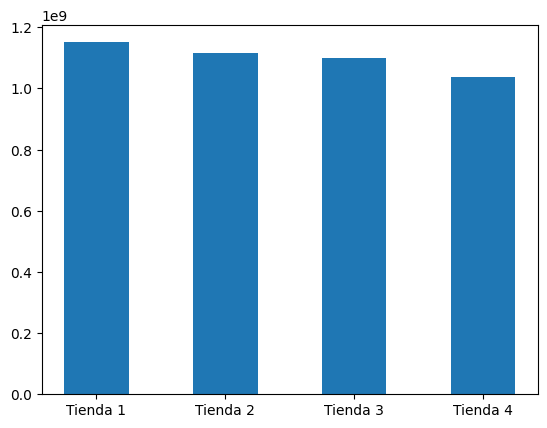

In [66]:
x = np.array(tablaDatos['Nombre de la tienda'])
y = np.array(tablaDatos['Ingreso Total'])

plt.bar(x,y, width = 0.5)
plt.show()